## COMP4432 Machine Learning
#### Assignment 1
#### Megan Hoeksema

#### Packages

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Assignment 1, Part 1: Data Loading and Preparation
Load the diabetes dataset into two numpy arrays: one for the feature set and one for the target. Pick a single feature to try to predict the target (disease progression). Document the reason you chose the feature you did. Break your single feature and target sets into training and test sets with the last 20 rows being in the test set.

In [6]:
# Load the diabetes dataset
diabetes = load_diabetes()

diabetesDF = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetesDF.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
diabetes['target'] = diabetes.target
# diabetes.target

In [10]:
features = diabetes.data[:,6]
target = diabetes.target

#### Reason for choosing the feature
I chose BMI as the feature because the most common association with diabetes is weight, so bmi should be a good predictive marker.

In [15]:
# Break feature data into training and test sets.
features_train = features[:-20]
features_test = features[-20:]

# Check the content of the arrays
# feature_train
# feature_test

# Reshape the arrays
features_train = features_train.reshape(-1, 1)
features_test = features_test.reshape(-1, 1)

In [16]:
# Break target data into training and test sets.
target_train = target[:-20]
target_test = target[-20:]

#Check the content of the arrays
# target_train
# target_test

# Reshape the arrays
target_train = target_train.reshape(-1, 1)
target_test = target_test.reshape(-1, 1)

### Assignment 1, Part 2: Model Training
Instantiate a linear regression model, and train it with your single feature and target sets.

In [19]:
# Instantiate a linear Regression Model on the training set.

model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

### Assignment 1, Part 3: Prediction and Measurement
List the first 10 predictions on your single feature training set. Print out the feature coefficient and the root mean squared error of your model.

In [38]:
# List the first 10 predictions on your single feature training set.

diabetesPred = model.predict(features_train)
diabetesPred[:10]

array([[181.12908445],
       [104.86361991],
       [173.97919715],
       [176.36249292],
       [147.76294371],
       [126.31328181],
       [152.52953525],
       [138.22976065],
       [171.59590138],
       [169.21260562]])

In [28]:
# Print out the feaeture coefficient
model.coef_

array([[-647.34661414]])

In [35]:
#Print out the root mean squared error of your model
model_mse = mean_squared_error(target_train, diabetesPred)
model_rmse = np.sqrt(model_mse)
model_rmse

70.91415737210087

### Assignment 1, Part 4: Visualization

Print out a scatter plot with the feature you chose on the x-axis, and progression on the y-axis. Plot the regression line on this same graph with appropriate labels on each axis.

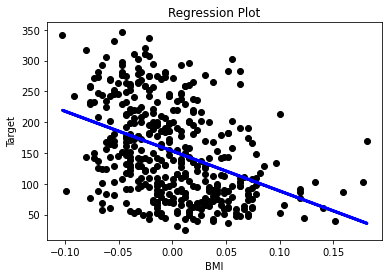

In [50]:
fig = plt.scatter(features_train, target_train, color="black")
fig = plt.plot(features_train, diabetesPred, color="blue", linewidth=3)
fig = plt.xlabel('BMI')
fig = plt.ylabel('Target')
fig = plt.title('Regression Plot')
plt.show()